In [153]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier, ExtraTreesClassifier
from scipy.stats import zscore
%matplotlib inline

In [154]:
bank_df = pd.read_csv('bank-full.csv')
bank_df.head(n=5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [155]:
print(bank_df.info())

# There are no null values in the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [156]:
print(bank_df['job'].value_counts())

print("\n")
print(bank_df['marital'].value_counts())

print("\n")
print(bank_df['education'].value_counts())

print("\n")
print(bank_df['default'].value_counts())

print("\n")
print(bank_df['housing'].value_counts())

print("\n")
print(bank_df['loan'].value_counts())

print("\n")
print(bank_df['contact'].value_counts())

print("\n")
print(bank_df['poutcome'].value_counts())

print("\n")
print(bank_df['Target'].value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


no     44396
yes      815
Name: default, dtype: int64


yes    25130
no     20081
Name: housing, dtype: int64


no     37967
yes     7244
Name: loan, dtype: int64


cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


no     39922
yes     5289
Name: Target, dtype: int64


# Initial info from the dataset

1) There are 288 people whose job is not known. Source of income of these people need to obtained from the customer

2) Education level of 1857 people are not present in the dataset

3) Theare are 13020 people who have not provided the contact numbers. This is 30 percent of people, with whom bank cannot do a    contact through phone to do marketing

4) The outcome of previous marketing campaign is unknown for almost 37000 people out of the total population 45210. This will
   impact the model accuracy. We have no option other than eliminating this from the data frame, as we cannot gather this data    now. The value 'other' has no meaning, because the outcome should be either 'success' or 'fail' The value other has to be
   removed along with unknown

In [157]:
print(bank_df.groupby(['job'])['Target'].value_counts())

print("\n")

print(bank_df.groupby(['education'])['Target'].value_counts())
print("\n")

print(bank_df.groupby(['contact'])['Target'].value_counts())
print("\n")

print(bank_df.groupby(['poutcome'])['Target'].value_counts())

job            Target
admin.         no        4540
               yes        631
blue-collar    no        9024
               yes        708
entrepreneur   no        1364
               yes        123
housemaid      no        1131
               yes        109
management     no        8157
               yes       1301
retired        no        1748
               yes        516
self-employed  no        1392
               yes        187
services       no        3785
               yes        369
student        no         669
               yes        269
technician     no        6757
               yes        840
unemployed     no        1101
               yes        202
unknown        no         254
               yes         34
Name: Target, dtype: int64


education  Target
primary    no         6260
           yes         591
secondary  no        20752
           yes        2450
tertiary   no        11305
           yes        1996
unknown    no         1605
           yes        

1) Almost 90 percent of Previous outcome output which is present as unknown, has rejected to subscribe the service. It is very
   important to know what are these unknown data. Data needs to be collected
  
2) Many people dont have contact, and almost most of the people who dont have a telephone, didnt subscribe to products.
   Either they have to contacted through email or through social media promotions OR try getting their phone numbers

3) Unknown data in Education and Job does not influence the output variable much


In [158]:
#Replace -1 and 999 with 0, as it means they have been not contacted
cols_replace = {"pdays":{-1:0,999:0},"Target":{"no":0,"yes":1},"poutcome":{"unknown":-1,"other":-1,"success":1,"failure":0},"month":{"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}}
bank_df = bank_df.replace(cols_replace)
bank_df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,0,0,-1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,0,0,-1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,0,0,-1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,0,0,-1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,0,0,-1,0


In [159]:
for column in bank_df.columns: # Loop through all columns in the dataframe
    if bank_df[column].dtype == 'object': # Only apply for columns with categorical strings
        bank_df[column] = pd.Categorical(bank_df[column])# Replace strings with an categorical numbers
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null category
day          45211 non-null int64
month        45211 non-null int64
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null int64
Target       45211 non-null int64
dtypes: category(7), int64(10)
memory usage: 3.8 MB


In [160]:
#Creating a boolean variable for each of the string variable
dummies_columns = ['job','education','marital','default','housing','loan','contact','poutcome']

bank_df=pd.get_dummies(bank_df, columns=dummies_columns)

bank_df.head(n=25)

,age,balance,day,month,duration,campaign,pdays,previous,Target,job_admin.,...,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_-1,poutcome_0,poutcome_1
0,58,2143,5,5,261,1,0,0,0,0,...,0,1,1,0,0,0,1,1,0,0
1,44,29,5,5,151,1,0,0,0,0,...,0,1,1,0,0,0,1,1,0,0
2,33,2,5,5,76,1,0,0,0,0,...,0,1,0,1,0,0,1,1,0,0
3,47,1506,5,5,92,1,0,0,0,0,...,0,1,1,0,0,0,1,1,0,0
4,33,1,5,5,198,1,0,0,0,0,...,1,0,1,0,0,0,1,1,0,0
5,35,231,5,5,139,1,0,0,0,0,...,0,1,1,0,0,0,1,1,0,0
6,28,447,5,5,217,1,0,0,0,0,...,0,1,0,1,0,0,1,1,0,0
7,42,2,5,5,380,1,0,0,0,0,...,0,1,1,0,0,0,1,1,0,0
8,58,121,5,5,50,1,0,0,0,0,...,0,1,1,0,0,0,1,1,0,0
9,43,593,5,5,55,1,0,0,0,0,...,0,1,1,0,0,0,1,1,0,0


In [161]:
#Analyse the 5 point summary of the data
bank_df.describe().transpose()

# 1) Clearly Outliers are present in balance, and that is expected. We cant expect all sorts of members in society 
#    to maintain bank balance

# 2) Duration of the calls are also skewed to the right too much

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
month,45211.0,6.144655,2.408034,1.0,5.0,6.0,8.0,12.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,41.015195,99.792615,0.0,0.0,0.0,0.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0
Target,45211.0,0.116985,0.321406,0.0,0.0,0.0,0.0,1.0
job_admin.,45211.0,0.114375,0.318269,0.0,0.0,0.0,0.0,1.0


In [152]:
sns.pairplot(bank_df,diag_kind='kde')

In [162]:
bank_df.corr()

,age,balance,day,month,duration,campaign,pdays,previous,Target,job_admin.,...,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_-1,poutcome_0,poutcome_1
age,1.000000,0.097783,-0.009120,0.092903,-0.004648,0.004760,-0.023841,0.001288,0.025155,-0.055717,...,0.185513,-0.185513,0.015655,-0.015655,-0.068375,0.170349,-0.020132,-0.013912,-0.004927,0.035526
balance,0.097783,1.000000,0.004503,0.094605,0.021560,-0.014578,0.003330,0.016674,0.052838,-0.026726,...,0.068768,-0.068768,0.084350,-0.084350,0.015880,0.037999,-0.037331,-0.028721,0.011857,0.035240
day,-0.009120,0.004503,1.000000,0.101989,-0.030206,0.162490,-0.093024,-0.051710,-0.028348,-0.010455,...,0.027982,-0.027982,-0.011370,0.011370,0.020186,0.023652,-0.034103,0.076842,-0.068700,-0.030321
month,0.092903,0.094605,0.101989,1.000000,-0.011866,0.054868,-0.109070,-0.035600,0.018717,-0.034056,...,0.173887,-0.173887,-0.021638,0.021638,0.153677,0.037628,-0.182490,0.032504,-0.055958,0.033700
duration,-0.004648,0.021560,-0.030206,-0.011866,1.000000,-0.084570,-0.001584,0.001203,0.394521,-0.015722,...,-0.005075,0.005075,0.012412,-0.012412,0.025543,-0.023201,-0.014379,-0.004974,-0.018925,0.042389
campaign,0.004760,-0.014578,0.162490,0.054868,-0.084570,1.000000,-0.088508,-0.032855,-0.073172,-0.021868,...,0.023599,-0.023599,-0.009980,0.009980,-0.032271,0.053895,0.004853,0.108153,-0.088131,-0.057486
pdays,-0.023841,0.003330,-0.093024,-0.109070,-0.001584,-0.088508,1.000000,0.454288,0.103323,0.027489,...,-0.124350,0.124350,0.022709,-0.022709,0.225733,0.015970,-0.246771,-0.741641,0.700558,0.227786
previous,0.001288,0.016674,-0.051710,-0.035600,0.001203,-0.032855,0.454288,1.000000,0.093236,0.014245,...,-0.037076,0.037076,0.011043,-0.011043,0.131717,0.028097,-0.154162,-0.416226,0.350627,0.201424
Target,0.025155,0.052838,-0.028348,0.018717,0.394521,-0.073172,0.103323,0.093236,1.000000,0.005637,...,0.139173,-0.139173,0.068185,-0.068185,0.135873,0.014042,-0.150935,-0.166863,0.009885,0.306788
job_admin.,-0.055717,-0.026726,-0.010455,-0.034056,-0.015722,-0.021868,0.027489,0.014245,0.005637,1.000000,...,-0.043046,0.043046,-0.030781,0.030781,0.000660,-0.012291,0.005961,-0.022636,0.018431,0.012056


1) It can be seen that amount of duration of time people spend on phone to talk with bank rep, chance of user to subscribe to the product becomes high. 

2) A somewhat positive corelation of Target with other feautures is between Target vs 'duration' and 'poutcome'

3) Duration of phone call is high with young people. As duration and target='yes' is corelated, it is very much essential, that mode of contact with senior people has to be established in multiple ways, to make the products to be subscribed by senior citizens

4) p_outcome has high corelation with the pdays. It can be seen in the pairgrid plot, that p_outcome_0 has 70 percent co-relation with the number of days the customer has been previously contacted. With the numbers of days, the customer has been previously contacted increases, outcome of campaign has worsened. So it is very important to keep in touch with customers, to make them aware of the new products. And as many people dont have a phone, campaign has to be done through email or via their job environment

5) p_outcome_-1 which is a outcome of campaign which is non-existent(Both unknown and other), has a high negative co-relation with pdays. We dont know what is this data, unknown does not throw a clear definition. It also has a high co-relation with some important feautures like 'contact' . As of now, as we dont know the meaning of the data in our dataframe, we need to reject this. But collecting right data again for this feauture is very important. Care has to be taken, to make sure future data are valid before going to be loaded into this dataframe

6) It is very strange to see the features "job" and "education" have very very weak co-relation with almost all other feauture. Job and balance should have a good co-relation, but may be customer maintaining salary account with another bank. If data of customer maintaining salary account with same bank is available, it can explain this situation

In [163]:
bank_df1 = bank_df
bank_df1.drop(['poutcome_-1','contact_unknown'],axis=1,inplace=True)

In [164]:
X = bank_df1.drop('Target',axis=1)
y = bank_df1.pop('Target')

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

bank_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 37 columns):
age                    45211 non-null int64
balance                45211 non-null int64
day                    45211 non-null int64
month                  45211 non-null int64
duration               45211 non-null int64
campaign               45211 non-null int64
pdays                  45211 non-null int64
previous               45211 non-null int64
job_admin.             45211 non-null uint8
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
job_management         45211 non-null uint8
job_retired            45211 non-null uint8
job_self-employed      45211 non-null uint8
job_services           45211 non-null uint8
job_student            45211 non-null uint8
job_technician         45211 non-null uint8
job_unemployed         45211 non-null uint8
job_unknown            45211 non-null uint8
education_p

# Build a model using logistic regression

Accuracy score using logistic regression is 90.0
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     12013
           1       0.63      0.33      0.43      1551

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.77      0.65      0.69     13564
weighted avg       0.88      0.90      0.89     13564

Printing confusion matrix for Logistic Regression Model


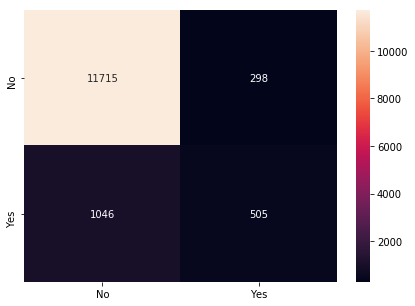

In [134]:
Logisticmodel = LogisticRegression(solver='liblinear')

#Liblinear provides a better accuracy score than other solver algorithms. Sag and Saga, eventhough user here for the large
# dataset, provides a little less accuracy than liblinear here
Logisticmodel.fit(X_train, y_train)
y_predict_LogisticRegression = Logisticmodel.predict(X_test)

model_score_LR = Logisticmodel.score(X_test, y_test) * 100
print("Accuracy score using logistic regression is {}".format(round(model_score_LR),3))

print(metrics.classification_report(y_test,y_predict_LogisticRegression))

LR_CF = metrics.confusion_matrix(y_test,y_predict_LogisticRegression)

df_LR = pd.DataFrame(LR_CF, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])

plt.figure(figsize = (7,5))
print("Printing confusion matrix for Logistic Regression Model")
sns.heatmap(df_LR, annot=True ,fmt='g')

# Build a model using Naive Bayes Classifier

Accuracy score using Naive Bayes Classifier is 85.0
              precision    recall  f1-score   support

           0       0.94      0.89      0.91     12013
           1       0.38      0.53      0.44      1551

   micro avg       0.85      0.85      0.85     13564
   macro avg       0.66      0.71      0.68     13564
weighted avg       0.87      0.85      0.86     13564

Printing confusion matrix for Naive Bayes Classifier Model


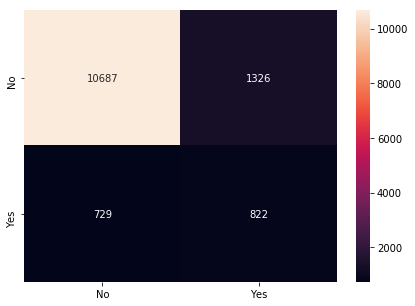

In [135]:
NB_Clf = GaussianNB()

NB_Clf.fit(X_train, y_train)
y_predict_NB = NB_Clf.predict(X_test)

model_score_NB=NB_Clf.score(X_test, y_test) * 100
print("Accuracy score using Naive Bayes Classifier is {}".format(round(model_score_NB),3))

print(metrics.classification_report(y_test,y_predict_NB))

LR_NB = metrics.confusion_matrix(y_test,y_predict_NB)

df_NB = pd.DataFrame(LR_NB, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])

plt.figure(figsize = (7,5))
print("Printing confusion matrix for Naive Bayes Classifier Model")
sns.heatmap(df_NB, annot=True ,fmt='g')

Logistic Regression model gave a better performance in terms of accuracy and as well as better f1 score. Lets try to improve performance of Logistic Regression using Bagging

# Build a model using Decision Tree

In [137]:
dTree_gini_raw = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree_gini_raw.fit(X_train, y_train)
ypredict_gini_raw = dTree_gini_raw.predict(X_test)
# creating a model (using gini index) without maximum depth, to be used in Ensembling techniques, as the ensembling techniques use only samples
# of the original data, and hence the overfit of model, is not a problem

dTree_gini = DecisionTreeClassifier(criterion = 'gini',max_depth=3, random_state=1)
dTree_gini.fit(X_train, y_train)
ypredict_gini = dTree_gini.predict(X_test)

dTree_entropy_raw = DecisionTreeClassifier(criterion = 'entropy',random_state=1)
dTree_entropy_raw.fit(X_train, y_train)
ypredict_entropy_raw = dTree_entropy_raw.predict(X_test)
# creating a model (using entropy index) without maximum depth, to be used in Ensembling techniques, as the ensembling techniques use only samples
# of the original data, and hence the overfit of model, is not a problem


dTree_entropy = DecisionTreeClassifier(criterion = 'entropy',max_depth=3,random_state=1)
dTree_entropy.fit(X_train, y_train)
ypredict_entropy  = dTree_entropy.predict(X_test)


print("\nTraining score using decision tree without depth and using gini index: \n"+str(round(dTree_gini_raw.score(X_train, y_train),3)))
print("\nTesting score using decision tree without depth and using gini index: \n"+str(round(dTree_gini_raw.score(X_test, y_test),3)))

print("\nTraining score using gini with depth: \n"+str(round(dTree_gini.score(X_train, y_train),3)))
print("\nTesting score using gini with depth: \n"+str(round(dTree_gini.score(X_test, y_test),3)))

print("\nTraining score using decision tree without depth and using entropy index: \n"+str(round(dTree_entropy_raw.score(X_train, y_train),3)))
print("\nTesting score using decision tree without depth and using entropy index: \n"+str(round(dTree_entropy_raw.score(X_test, y_test),3)))

print("\nTraining score using entropy with depth: \n"+str(round(dTree_entropy.score(X_train, y_train),3)))
print("\nTesting score using entropy with depth: \n"+str(round(dTree_entropy.score(X_test, y_test),3)))


print("\nConfusion Matrix metrics using Gini index with depth: \n"+metrics.classification_report(y_test,ypredict_gini))

print("\nConfusion Matrix metrics using entropy index with depth: \n"+metrics.classification_report(y_test,ypredict_entropy))

cm_gini = metrics.confusion_matrix(y_test,ypredict_gini)
cm_entropy = metrics.confusion_matrix(y_test,ypredict_entropy)

df_cm_gini = pd.DataFrame(cm_gini, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
df_cm_entropy = pd.DataFrame(cm_entropy, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])


Training score using decision tree without depth and using gini index: 
1.0

Testing score using decision tree without depth and using gini index: 
0.875

Training score using gini with depth: 
0.901

Testing score using gini with depth: 
0.902

Training score using decision tree without depth and using entropy index: 
1.0

Testing score using decision tree without depth and using entropy index: 
0.876

Training score using entropy with depth: 
0.9

Testing score using entropy with depth: 
0.901

Confusion Matrix metrics using Gini index with depth: 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     12013
           1       0.65      0.31      0.42      1551

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.78      0.65      0.68     13564
weighted avg       0.89      0.90      0.89     13564


Confusion Matrix metrics using entropy index with depth: 
              precision    recall  f1-score   support

 

Decision Trees are prone to over-fit without depth, and it can be seen with training data without depth

Accuracy of the score does not increase much when compared with Logistic Regression. And also the decision tree method with both Gini index and Entropy information gain, gave similar accuracy results

Lets try improving with bagging and boosting

Printing confusion matrix for decision tree using gini index


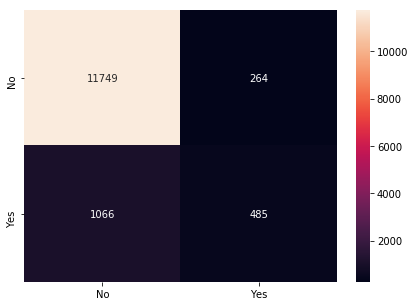

In [165]:
plt.figure(figsize = (7,5))
print("Printing confusion matrix for decision tree using gini index")
sns.heatmap(df_cm_gini, annot=True ,fmt='g')

Printing confusion matrix for decision tree using entropy index


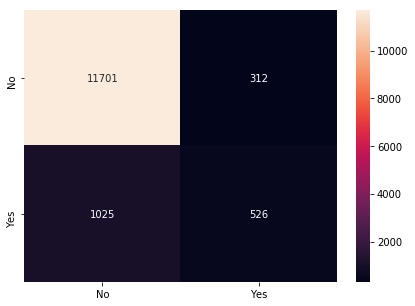

In [139]:
plt.figure(figsize = (7,5))
print("Printing confusion matrix for decision tree using entropy index")
sns.heatmap(df_cm_entropy, annot=True ,fmt='g')

# Try Improving Performance of Logistic Regression model using Bagging

In [140]:
bgcl_LR_Gini = BaggingClassifier(base_estimator=Logisticmodel, n_estimators=100,random_state=1)
bgcl_LR_Gini.fit(X_train, y_train)
ypredict_bgcl_LR_Gini = bgcl_LR_Gini.predict(X_test)

bgcl_LR_entropy = BaggingClassifier(base_estimator=Logisticmodel, n_estimators=100,random_state=1)
bgcl_LR_entropy.fit(X_train, y_train)
ypredict_bgcl_LR_entropy = bgcl_LR_entropy.predict(X_test)

print("\nTesting score using bagging_LR_Gini: \n"+str(round(bgcl_LR_Gini.score(X_test, y_test),3)))
print("\nTesting score using bagging_LR_entropy: \n"+str(round(bgcl_LR_entropy.score(X_test, y_test),3)))

print("\nConfusion Matrix metrics using Bagging_LR_gini index: \n"+metrics.classification_report(y_test,ypredict_bgcl_LR_Gini))

print("\nConfusion Matrix metrics using Bagging_LR_entropy index: \n"+metrics.classification_report(y_test,ypredict_bgcl_LR_entropy))


Testing score using bagging_LR_Gini: 
0.901

Testing score using bagging_LR_entropy: 
0.901

Confusion Matrix metrics using Bagging_LR_gini index: 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     12013
           1       0.63      0.32      0.43      1551

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.77      0.65      0.69     13564
weighted avg       0.88      0.90      0.89     13564


Confusion Matrix metrics using Bagging_LR_entropy index: 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     12013
           1       0.63      0.32      0.43      1551

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.77      0.65      0.69     13564
weighted avg       0.88      0.90      0.89     13564



There are no major improvements on trying to improve the performance of a logistic regression model using bagging

# Try Improving Performance of decision Tree model using Bagging

In [141]:
bgcl_gini = BaggingClassifier(base_estimator=dTree_gini_raw, n_estimators=100,random_state=1)
bgcl_gini.fit(X_train, y_train)
ypredict_bgcl_gini = bgcl_gini.predict(X_test)

bgcl_entropy = BaggingClassifier(base_estimator=dTree_entropy_raw, n_estimators=100,random_state=1)
bgcl_entropy.fit(X_train, y_train)
ypredict_bgcl_entropy = bgcl_entropy.predict(X_test)

print("\nTesting score using bagging_gini: \n"+str(round(bgcl_gini.score(X_test, y_test),3)))
print("\nTesting score using bagging_entropy: \n"+str(round(bgcl_entropy.score(X_test, y_test),3)))

print("\nConfusion Matrix metrics using Bagging_gini index: \n"+metrics.classification_report(y_test,ypredict_bgcl_gini))

print("\nConfusion Matrix metrics using Bagging_entropy index: \n"+metrics.classification_report(y_test,ypredict_bgcl_entropy))

cm_gini_bagged = metrics.confusion_matrix(y_test,ypredict_bgcl_gini)
cm_entropy_bagged = metrics.confusion_matrix(y_test,ypredict_bgcl_entropy)

df_cm_gini_bagged = pd.DataFrame(cm_gini_bagged, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
df_cm_entropy_bagged = pd.DataFrame(cm_entropy_bagged, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])


Testing score using bagging_gini: 
0.907

Testing score using bagging_entropy: 
0.908

Confusion Matrix metrics using Bagging_gini index: 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     12013
           1       0.62      0.50      0.55      1551

   micro avg       0.91      0.91      0.91     13564
   macro avg       0.78      0.73      0.75     13564
weighted avg       0.90      0.91      0.90     13564


Confusion Matrix metrics using Bagging_entropy index: 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     12013
           1       0.63      0.48      0.55      1551

   micro avg       0.91      0.91      0.91     13564
   macro avg       0.78      0.72      0.75     13564
weighted avg       0.90      0.91      0.90     13564



Performance of decision tree has slightly improved giving a 91 percent score, compared with the previous accuracy score of 90

F1 score, which is a weighted average of precision and recal, gives 90 percent score when compared with previous output of 89

Bagging has given a slight improvement in performance

Printing confusion matrix for Bagging decision tree using gini index


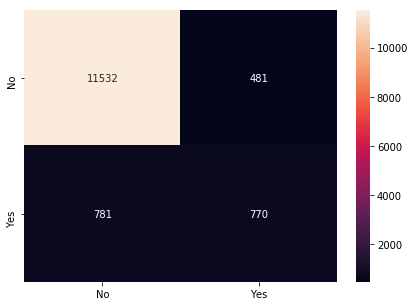

In [48]:
plt.figure(figsize = (7,5))
print("Printing confusion matrix for Bagging decision tree using gini index")
sns.heatmap(df_cm_gini_bagged, annot=True ,fmt='g')

Printing confusion matric for Bagging decision tree using entropy index


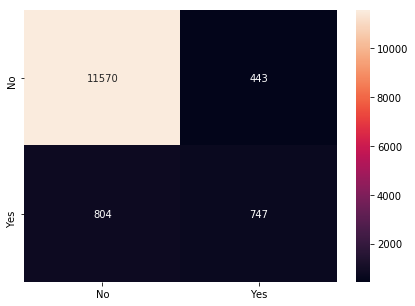

In [49]:
plt.figure(figsize = (7,5))
print("Printing confusion matric for Bagging decision tree using entropy index")
sns.heatmap(df_cm_entropy_bagged, annot=True ,fmt='g')

# Try Improving Performance of model using Gradient Boosting

In [50]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

# Creating a learning rate list, with which we want our model to reduce the loss function

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, random_state=0)
    gb_clf.fit(X_train, y_train)
    gb_clf_predict = gb_clf.predict(X_test)

    print("Learning rate: ", learning_rate)
    print("Accuracy score: {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score: 0.904
Learning rate:  0.075
Accuracy score: 0.905
Learning rate:  0.1
Accuracy score: 0.906
Learning rate:  0.25
Accuracy score: 0.907
Learning rate:  0.5
Accuracy score: 0.907
Learning rate:  0.75
Accuracy score: 0.905
Learning rate:  1
Accuracy score: 0.903


Accuracy score: 0.907

Confusion Matrix metrics using GradientBoosting index: 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12013
           1       0.63      0.44      0.52      1551

   micro avg       0.91      0.91      0.91     13564
   macro avg       0.78      0.70      0.73     13564
weighted avg       0.90      0.91      0.90     13564

Printing confusion matrix for Gradient Boost Classifier


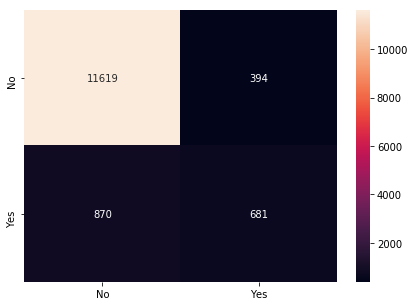

In [169]:
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.25, random_state=0)
gb_clf.fit(X_train, y_train)
gb_clf_predict = gb_clf.predict(X_test)

print("Accuracy score: {0:.3f}".format(gb_clf.score(X_test, y_test)))

print("\nConfusion Matrix metrics using GradientBoosting index: \n"+metrics.classification_report(y_test,gb_clf_predict))

# Visualizing Confusion Matrix for Gradient Boosting

cm_GradientBoost_clf = metrics.confusion_matrix(y_test,gb_clf_predict)

df_cm_GradientBoost_clf = pd.DataFrame(cm_GradientBoost_clf, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])

plt.figure(figsize = (7,5))
print("Printing confusion matrix for Gradient Boost Classifier")
sns.heatmap(df_cm_GradientBoost_clf, annot=True ,fmt='g')

# Try Improving Performance of model using Ada Boosting

In [52]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    ada_clf = AdaBoostClassifier(base_estimator = dTree_gini,n_estimators=100,learning_rate=learning_rate,random_state=0)
    ada_clf.fit(X_train, y_train)
    ada_clf_predict = ada_clf.predict(X_test)

    print("Learning rate: ", learning_rate)
    print("Accuracy score: {0:.3f}".format(ada_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score: 0.903
Learning rate:  0.075
Accuracy score: 0.904
Learning rate:  0.1
Accuracy score: 0.907
Learning rate:  0.25
Accuracy score: 0.909
Learning rate:  0.5
Accuracy score: 0.906
Learning rate:  0.75
Accuracy score: 0.905
Learning rate:  1
Accuracy score: 0.903


Accuracy score: 0.909

Confusion Matrix metrics using AdBoosting index: 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12013
           1       0.65      0.44      0.53      1551

   micro avg       0.91      0.91      0.91     13564
   macro avg       0.79      0.71      0.74     13564
weighted avg       0.90      0.91      0.90     13564

Printing confusion matrix for Ada Boost Classifier


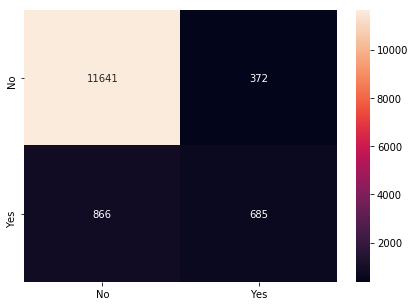

In [168]:
ada_clf = AdaBoostClassifier(base_estimator = dTree_gini,n_estimators=100,learning_rate=0.25,random_state=0)
ada_clf.fit(X_train, y_train)
ada_clf_predict = ada_clf.predict(X_test)

print("Accuracy score: {0:.3f}".format(ada_clf.score(X_test, y_test)))
print("\nConfusion Matrix metrics using AdBoosting index: \n"+metrics.classification_report(y_test,ada_clf_predict))

# Visualizing Confusion Matrix for Ada Boosting

cm_AdaBoost_clf = metrics.confusion_matrix(y_test,ada_clf_predict)

df_cm_AdaBoost_clf = pd.DataFrame(cm_AdaBoost_clf, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])

plt.figure(figsize = (7,5))
print("Printing confusion matrix for Ada Boost Classifier")
sns.heatmap(df_cm_AdaBoost_clf, annot=True ,fmt='g')

Boosting and Bagging gave similar results in terms of accuracy score and f1 score

# Build Model using Random Forest

In [54]:
max_features_list = range(5,20)
for maxFeautures in max_features_list:
    RandomForrest_clf_gini = RandomForestClassifier(n_estimators=100,criterion = 'gini',max_features = maxFeautures,random_state=1)
    RandomForrest_clf_gini.fit(X_train, y_train)
    RandomForrest_clf_gini_predict = RandomForrest_clf_gini.predict(X_test)
    print("\nNumber Of Features used :{}".format(maxFeautures))
    print("Accuracy score for RandomForrest_clf_gini: {0:.3f}".format(RandomForrest_clf_gini.score(X_test, y_test)))
    #print("\nConfusion Matrix metrics using RandomForrest_Gini : \n"+metrics.classification_report(y_test,RandomForrest_clf_gini_predict)) 


Number Of Features used :5
Accuracy score for RandomForrest_clf_gini: 0.904

Number Of Features used :6
Accuracy score for RandomForrest_clf_gini: 0.905

Number Of Features used :7
Accuracy score for RandomForrest_clf_gini: 0.907

Number Of Features used :8
Accuracy score for RandomForrest_clf_gini: 0.906

Number Of Features used :9
Accuracy score for RandomForrest_clf_gini: 0.906

Number Of Features used :10
Accuracy score for RandomForrest_clf_gini: 0.906

Number Of Features used :11
Accuracy score for RandomForrest_clf_gini: 0.907

Number Of Features used :12
Accuracy score for RandomForrest_clf_gini: 0.907

Number Of Features used :13
Accuracy score for RandomForrest_clf_gini: 0.908

Number Of Features used :14
Accuracy score for RandomForrest_clf_gini: 0.908

Number Of Features used :15
Accuracy score for RandomForrest_clf_gini: 0.907

Number Of Features used :16
Accuracy score for RandomForrest_clf_gini: 0.906

Number Of Features used :17
Accuracy score for RandomForrest_clf_gin

In [55]:

RandomForrest_clf_gini = RandomForestClassifier(n_estimators=100,criterion = 'gini',max_features = 14,random_state=1)
RandomForrest_clf_gini.fit(X_train, y_train)
RandomForrest_clf_gini_predict = RandomForrest_clf_gini.predict(X_test)
print("\nNumber Of Features used :{}".format(maxFeautures))
print("Accuracy score for RandomForrest_clf_gini: {0:.3f}".format(RandomForrest_clf_gini.score(X_test, y_test)))
print("\nConfusion Matrix metrics using RandomForrest_Gini : \n"+metrics.classification_report(y_test,RandomForrest_clf_gini_predict)) 


Number Of Features used :19
Accuracy score for RandomForrest_clf_gini: 0.908

Confusion Matrix metrics using RandomForrest_Gini : 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12013
           1       0.63      0.46      0.53      1551

   micro avg       0.91      0.91      0.91     13564
   macro avg       0.78      0.71      0.74     13564
weighted avg       0.90      0.91      0.90     13564



Printing confusion matrix for Random Forest


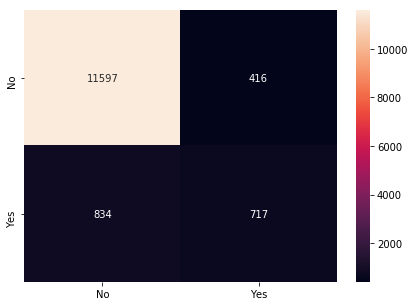

In [167]:
# Visualizing Confusion Matrix for Random Forest

cm_RF_clf = metrics.confusion_matrix(y_test,RandomForrest_clf_gini_predict)

df_cm_RF_clf = pd.DataFrame(cm_RF_clf, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])

plt.figure(figsize = (7,5))
print("Printing confusion matrix for Random Forest")
sns.heatmap(df_cm_RF_clf, annot=True ,fmt='g')

# Build Model using Extra Trees Classifier

In [56]:
max_features_list = range(5,20)
for maxFeautures in max_features_list:
    ExtraTrees_clf_entropy = ExtraTreesClassifier(n_estimators=100,criterion = 'entropy',max_features = maxFeautures,random_state=1)
    ExtraTrees_clf_entropy.fit(X_train, y_train)
    yPredict_ExtraTrees_clf_entropy = ExtraTrees_clf_entropy.predict(X_test)
    print("\nNumber Of Features used :{}".format(maxFeautures))
    print("Accuracy score for ExtraTrees_clf: {0:.3f}".format(ExtraTrees_clf_entropy.score(X_test, y_test)))


Number Of Features used :5
Accuracy score for ExtraTrees_clf: 0.902

Number Of Features used :6
Accuracy score for ExtraTrees_clf: 0.901

Number Of Features used :7
Accuracy score for ExtraTrees_clf: 0.902

Number Of Features used :8
Accuracy score for ExtraTrees_clf: 0.903

Number Of Features used :9
Accuracy score for ExtraTrees_clf: 0.902

Number Of Features used :10
Accuracy score for ExtraTrees_clf: 0.902

Number Of Features used :11
Accuracy score for ExtraTrees_clf: 0.903

Number Of Features used :12
Accuracy score for ExtraTrees_clf: 0.902

Number Of Features used :13
Accuracy score for ExtraTrees_clf: 0.903

Number Of Features used :14
Accuracy score for ExtraTrees_clf: 0.902

Number Of Features used :15
Accuracy score for ExtraTrees_clf: 0.904

Number Of Features used :16
Accuracy score for ExtraTrees_clf: 0.901

Number Of Features used :17
Accuracy score for ExtraTrees_clf: 0.903

Number Of Features used :18
Accuracy score for ExtraTrees_clf: 0.902

Number Of Features used 

In [57]:
max_features_list = range(5,20)
for maxFeautures in max_features_list:
    ExtraTrees_clf_gini = ExtraTreesClassifier(n_estimators=100,criterion = 'gini',max_features = maxFeautures,random_state=1)
    ExtraTrees_clf_gini.fit(X_train, y_train)
    yPredict_ExtraTrees_clf_gini = ExtraTrees_clf_gini.predict(X_test)
    print("\nNumber Of Features used :{}".format(maxFeautures))
    print("Accuracy score for ExtraTrees_clf: {0:.3f}".format(ExtraTrees_clf_gini.score(X_test, y_test)))


Number Of Features used :5
Accuracy score for ExtraTrees_clf: 0.901

Number Of Features used :6
Accuracy score for ExtraTrees_clf: 0.901

Number Of Features used :7
Accuracy score for ExtraTrees_clf: 0.903

Number Of Features used :8
Accuracy score for ExtraTrees_clf: 0.904

Number Of Features used :9
Accuracy score for ExtraTrees_clf: 0.902

Number Of Features used :10
Accuracy score for ExtraTrees_clf: 0.902

Number Of Features used :11
Accuracy score for ExtraTrees_clf: 0.902

Number Of Features used :12
Accuracy score for ExtraTrees_clf: 0.903

Number Of Features used :13
Accuracy score for ExtraTrees_clf: 0.903

Number Of Features used :14
Accuracy score for ExtraTrees_clf: 0.903

Number Of Features used :15
Accuracy score for ExtraTrees_clf: 0.902

Number Of Features used :16
Accuracy score for ExtraTrees_clf: 0.902

Number Of Features used :17
Accuracy score for ExtraTrees_clf: 0.902

Number Of Features used :18
Accuracy score for ExtraTrees_clf: 0.902

Number Of Features used 

In [58]:
ExtraTrees_clf = ExtraTreesClassifier(n_estimators=100,criterion = 'entropy',max_features = 8,random_state=1)
ExtraTrees_clf.fit(X_train, y_train)
yPredict_ExtraTrees_clf = ExtraTrees_clf.predict(X_test)
print("\nNumber Of Features used :{}".format(maxFeautures))
print("Accuracy score for ExtraTrees_clf: {0:.3f}".format(ExtraTrees_clf.score(X_test, y_test)))
print("\nConfusion Matrix metrics using ExtraTreesClassifier : \n"+metrics.classification_report(y_test,yPredict_ExtraTrees_clf)) 


Number Of Features used :19
Accuracy score for ExtraTrees_clf: 0.903

Confusion Matrix metrics using ExtraTreesClassifier : 
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     12013
           1       0.63      0.35      0.45      1551

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.78      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564



# Random forest provided a similar output as that of bagging and boosting a logistic model. We settle with a max accuracy score of 91 percent, as a result of boosting/bagging

# In terms of Precision, Recall and F1score --> Adaptive Boosting and Random Forest has performed a little better than all other models

# For attracting more customers to subscribe products, campaigning through different modes of contact should be done, and also a constant touch with customers is essential

# Before releasing this model to production, the campaign results has to be re-collected and validated to get a valid data for the contact and p_outcome - 'Unknown' values